In [1]:
import PIL
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 15

In [2]:
index = []
for top in ['best', 'worst']:
    for rank in range(1, 6):
        index.append(top + str(rank))
column1 = []
for data in datas:
    column1.append(data)
    column1.append(data)

In [ ]:
len(df.loc[top + str(rank)])

In [64]:
df = pd.DataFrame("", index=index, columns=[column1, [1,5]*5])
for idx in index:
    acc_list = []
    for data in datas: 
        for shot in [1, 5]:
            fmt = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}shot_head_default/{}.txt'
            path = fmt.format(data, shot, idx)
            with open(path, 'rb') as f:
                test_acc = pickle.load(f)
            acc_list.append("{:.2f}".format(float(test_acc)))
    df.loc[idx] = acc_list
df.T

best1   best2   best3   best4   best5 worst1 worst2 worst3  \
mini_test 1   86.67   81.33   81.33   80.00   77.33  22.67  26.67  28.00   
          5   96.00   94.67   94.67   93.33   93.33  57.33  57.33  58.67   
crop      1   96.00   96.00   96.00   96.00   96.00  36.00  37.33  44.00   
          5  100.00  100.00  100.00  100.00  100.00  66.67  72.00  74.67   
euro      1   90.67   90.67   89.33   88.00   86.67  28.00  30.67  37.33   
          5   97.33   97.33   97.33   97.33   97.33  57.33  60.00  62.67   
isic      1   46.67   45.33   45.33   45.33   45.33   6.67  13.33  13.33   
          5   61.33   61.33   58.67   56.00   56.00  20.00  22.67  24.00   
chest     1   37.33   34.67   34.67   34.67   33.33   5.33   8.00   9.33   
          5   41.33   41.33   41.33   38.67   37.33   9.33  12.00  12.00   

            worst4 worst5  
mini_test 1  33.33  33.33  
          5  58.67  58.67  
crop      1  44.00  45.33  
          5  74.67  74.67  
euro      1  37.33  37.33  
          5  64.00  65.33  
isic      1  14.67  14.67  
          5  24.00  26.67  
chest     1   9.33  12.00  
          5  13.33  14.67

In [74]:
df.T.loc[data]

,best1,best2,best3,best4,best5,worst1,worst2,worst3,worst4,worst5
1,37.33,34.67,34.67,34.67,33.33,5.33,8.00,9.33,9.33,12.00
5,41.33,41.33,41.33,38.67,37.33,9.33,12.00,12.00,13.33,14.67


In [72]:
instab_list

[[2.4898985302717125,
  2.9007990334469502,
  2.2100676389651683,
  1.9921279216994752,
  2.543237445386395,
  1.0628722124698342,
  1.844164642333915,
  1.7510615519125015,
  1.7950676993101204,
  2.109632417465323],
 [2.0964834099495278,
  1.7878504614646968,
  1.8534885419651634,
  1.66295911114656,
  1.851986824151983,
  1.1156273687826637,
  1.4788595795587616,
  1.3300297174324591,
  1.9694638320284852,
  1.6343670996782724]]

In [73]:
df.T.loc[data] = instab_list

In [31]:
df.T

best1   best2   best3   best4   best5 worst1 worst2 worst3  \
mini_test 1   86.67   81.33   81.33   80.00   77.33  22.67  26.67  28.00   
          5   96.00   94.67   94.67   93.33   93.33  57.33  57.33  58.67   
crop      1   96.00   96.00   96.00   96.00   96.00  36.00  37.33  44.00   
          5  100.00  100.00  100.00  100.00  100.00  66.67  72.00  74.67   
euro      1   90.67   90.67   89.33   88.00   86.67  28.00  30.67  37.33   
          5   97.33   97.33   97.33   97.33   97.33  57.33  60.00  62.67   
isic      1   46.67   45.33   45.33   45.33   45.33   6.67  13.33  13.33   
          5   61.33   61.33   58.67   56.00   56.00  20.00  22.67  24.00   
chest     1   37.33   34.67   34.67   34.67   33.33   5.33   8.00   9.33   
          5   41.33   41.33   41.33   38.67   37.33   9.33  12.00  12.00   

            worst4 worst5  
mini_test 1  33.33  33.33  
          5  58.67  58.67  
crop      1  44.00  45.33  
          5  74.67  74.67  
euro      1  37.33  37.33  
          5  64.00  65.33  
isic      1  14.67  14.67  
          5  24.00  26.67  
chest     1   9.33  12.00  
          5  13.33  14.67

In [76]:
# fixed orderin, different inits
df = pd.DataFrame("", index=index, columns=[column1, [1,5]*5]).T
for data in datas: 
    instab_list = []
    for shot in [1, 5]:
        fmt = './logs/ordering/analysis2/effect_init/{}/05way_00{}shot_head_default/acc_history.csv'
        path = fmt.format(data, shot)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        instab = test_acc.std(axis=1)*100
        instab_list.append(list(instab))
    df.loc[data] = instab_list
df = df.T
df

mini_test                crop                euro                isic  \
               1         5         1         5         1         5         1   
best1   2.945033  1.984724  1.580125       0.0   1.92011  0.779536  1.893743   
best2   2.911459  1.459609  1.385576  0.133333   1.55838  0.464207  1.845722   
best3   3.327942  1.303299   2.20889  0.634793  2.113885  0.745987  2.649778   
best4   3.238267  2.156441  2.082001  0.769333  1.488542  0.586568  1.988113   
best5   3.543895  1.490954  1.480134  0.292057  1.532293  1.409029  2.071278   
worst1  3.216651  2.757347   3.32427  1.613857  2.531951  2.076688  1.151508   
worst2   3.15194  2.049182  3.551993  2.275087  2.526839   1.85373   1.09483   
worst3  3.376581  1.815558  2.020723  1.344331  2.101958  1.782822  1.963254   
worst4  3.747448  2.507148  1.890374   1.23808   1.68527  2.177324  1.562524   
worst5  3.026972  2.128783  2.282771  1.492218  2.971741  1.578476  3.533543   

                     chest            
               5         1         5  
best1   1.629359  2.489899  2.096483  
best2   2.125744  2.900799   1.78785  
best3   1.897533  2.210068  1.853489  
best4   1.233646  1.992128  1.662959  
best5   1.311881  2.543237  1.851987  
worst1  1.127874  1.062872  1.115627  
worst2  1.430782  1.844165   1.47886  
worst3  1.197003  1.751062   1.33003  
worst4  1.178254  1.795068  1.969464  
worst5  1.472532  2.109632  1.634367

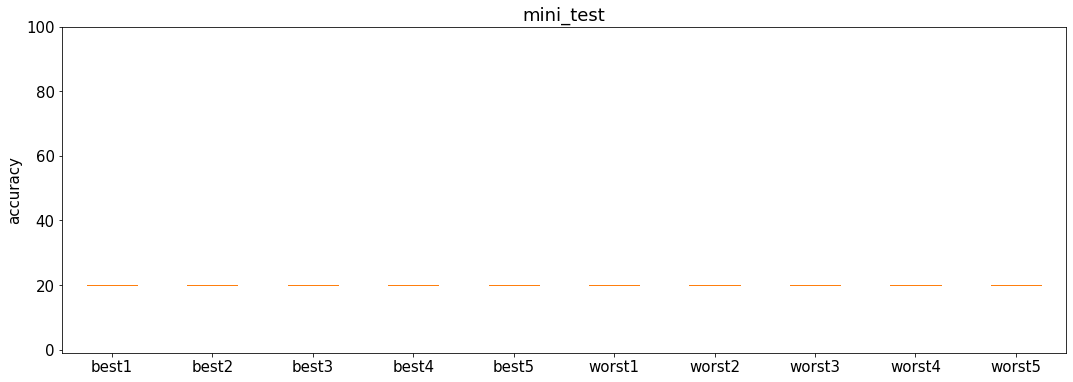

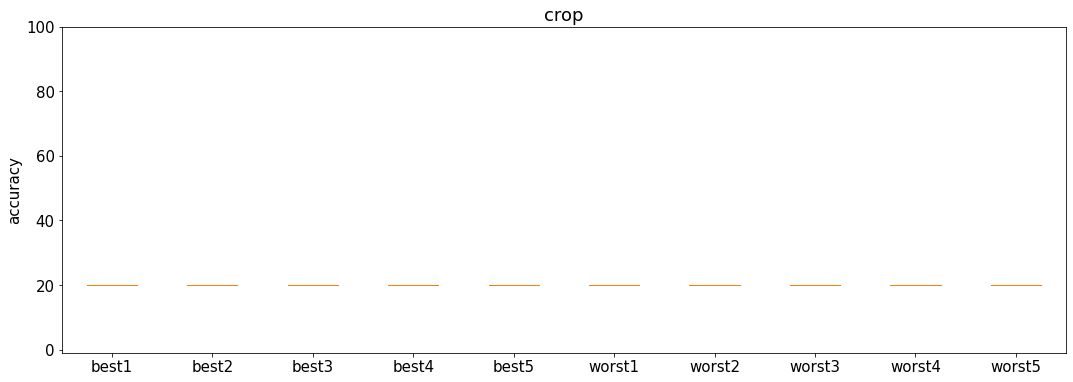

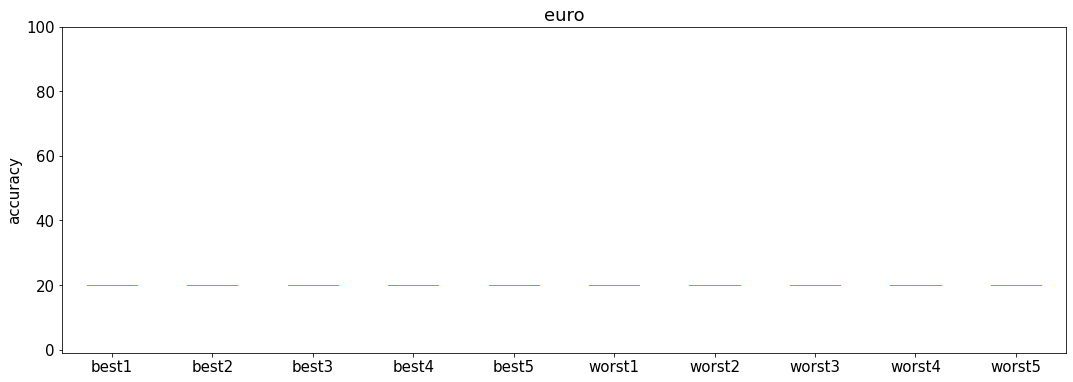

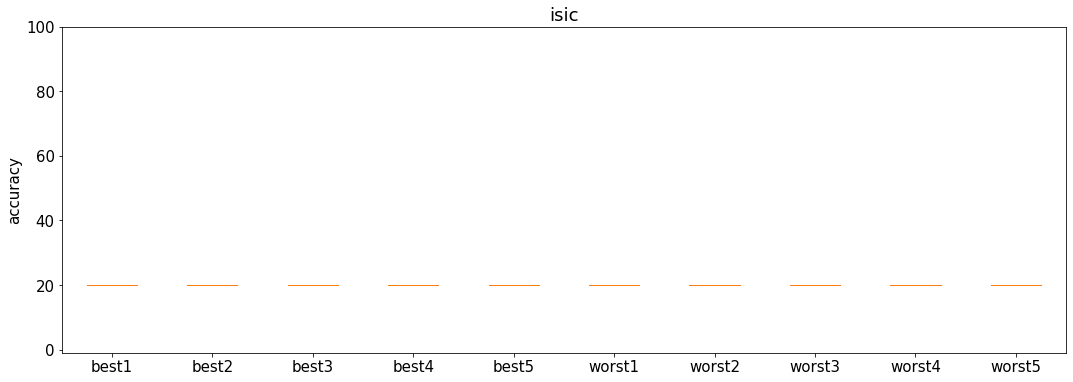

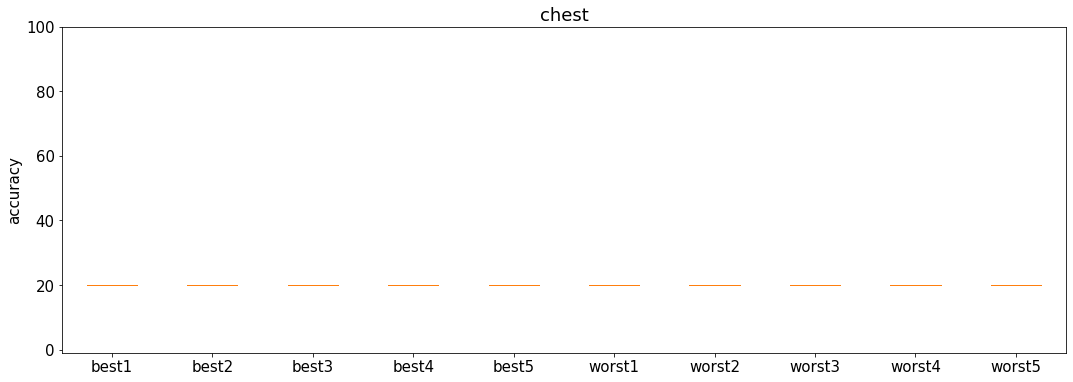

In [104]:
for data in datas:
    path = './logs/ordering/analysis2/effect_init/{}/05way_005shot_head_default/acc_history.csv'.format(data)
    df = pd.read_csv(path, index_col='Unnamed: 0')
    fig = plt.figure(figsize=(18,6))
    ax = fig.add_subplot(1, 1, 1) 
    ax.boxplot(df.T*100)
    plt.xticks(df.index, labels = index)
    plt.ylim(-1, 100)
    plt.ylabel("accuracy")
    plt.title(data)
    plt.show()

???????

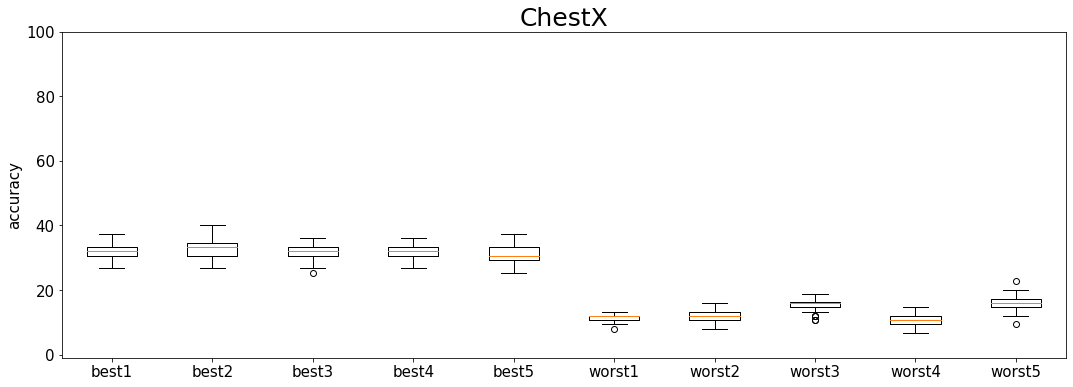

In [105]:
path = './logs/ordering/analysis2/effect_init/chest/05way_001shot_head_default/acc_history.csv'.format(data)
df = pd.read_csv(path, index_col='Unnamed: 0')

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.boxplot(df.T*100)
plt.xticks(df.index, labels = index)
plt.ylim(-1, 100)
plt.ylabel("accuracy")
plt.title("ChestX", fontsize=25)
plt.show()

best와 fail이 차이가 나는 건 데이터가 달라서 그런거고,
각 데이터 안에서도 variance가 생기는 것은 input 순서 때문이다 

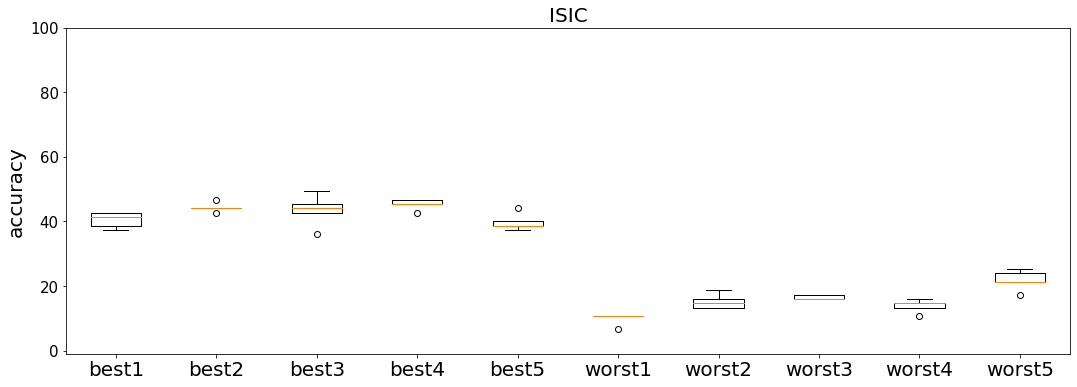

In [98]:
path = './logs/ordering/analysis3/effect_ordering/isic/05way_001shot_head_default/acc_history.csv'.format(data)
df = pd.read_csv(path, index_col='Unnamed: 0')
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.boxplot(df.T*100)
plt.xticks(df.index, labels = index, fontsize = 20)
plt.ylim(-1, 100)
plt.ylabel("accuracy", fontsize = 20)
plt.title("ISIC", fontsize=20)
plt.show()

In [ ]:
result = pd.DataFrame("", index=index, columns=[column1, [1,5]*5])
for idx in result.index:
    for shot in result.columns:
        path = "./logs/ordering/analysis2/effect_init/{}/05way_005shot_head_default/".format(data, shot[0])
        test_acc = pd.read_csv(path+"acc_history.csv", index_col='Unnamed: 0')
        instab = test_acc.std(axis=1)*100
        result.loc[idx] = acc_list
display(result)

In [ ]:
index[idx]

In [ ]:
result.loc[:, data][shot]

In [ ]:
result = pd.DataFrame("", index=index, columns=[column1, [1,5]*5])
for data in datas: 
    for shot in [1, 5]:
        path = "./logs/ordering/analysis2/effect_init/{}/05way_00{}shot_head_default/".format(data, shot)
        test_acc = pd.read_csv(path+"acc_history.csv", index_col='Unnamed: 0')
        instab = test_acc.std(axis=1)*100
        for idx in range(10):
            result.loc[index[idx], data][shot] = instab[idx+1]
            print(instab[idx+1])
result